In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import networkx as nx
import copy

In [2]:
n = 5
shape = (10,) * n
tensor = torch.randn(shape)

In [22]:
class TN():
    def initTensor(self, shape):
        return torch.randn(shape)
    
    def __init__(self, G, sizes, ranks):
        if len(G.edges) != len(ranks):
            raise Exception("Rank length must be equal to the number of edges")
        if len(G.nodes) != len(sizes):
            raise Exception("Sizes length must be equal to the number of nodes")
        self.data = nx.Graph()
        i = 0
        for node in G.nodes:
            shape = [sizes[i]]
            self.data.add_node(node, shape=shape)
            i += 1
        i = 0
        for edge in G.edges:
            self.data.nodes[edge[0]]['shape'].append(ranks[i])
            self.data.nodes[edge[1]]['shape'].append(ranks[i])
            self.data.add_edge(edge[0], edge[1], rank=ranks[i], from_index=len(self.data.nodes[edge[0]]['shape']) - 1, to_index=len(self.data.nodes[edge[1]]['shape']) - 1)
            i += 1
        i = 0
        for node in G.nodes:
            self.data.nodes[node]['tensor'] = self.initTensor(self.data.nodes[node]['shape'])
        self.m = len(self.data.nodes) + 1
        print(self.data.edges(data=True))

    def merge_nodes(self, node1, node2):
        t1 = self.data.nodes[node1]['tensor']
        t2 = self.data.nodes[node2]['tensor']
        self.data.get_edge_data(node1, node2)

    def edges(self):
        return self.data.edges
    
    def eval(self):
        J = copy.deepcopy(self)
        while len(J.edges()) > 1:
            edge = list(J.edges())[0]
            J.merge_nodes(edge[0], edge[1])
        

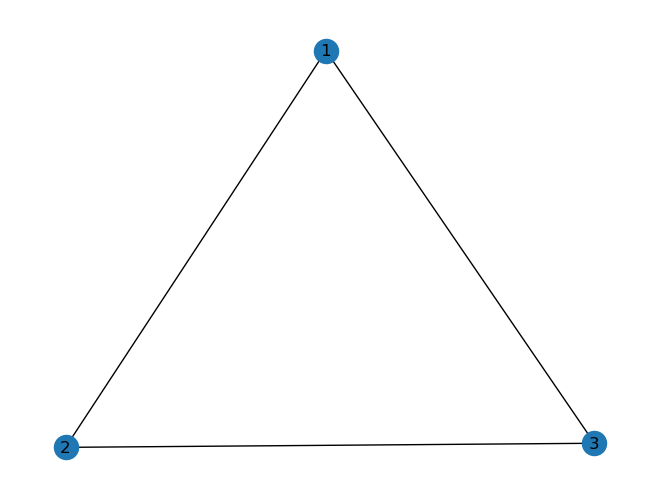

[(1, 2, {'rank': 5, 'from_index': 1, 'to_index': 1}), (1, 3, {'rank': 5, 'from_index': 2, 'to_index': 1}), (2, 3, {'rank': 5, 'from_index': 2, 'to_index': 2})]
[1]
[1]


TypeError: 'tuple' object does not support item assignment

In [23]:
# Create a simple graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

tn = TN(G, [10, 10, 10], [5,5,5])
tn.eval()

In [12]:
my_list = [1, 3, 5, 8, 10]
my_func = lambda x: x % 2 == 0  # returns True for even numbers
index = next((i for i, x in enumerate(my_list) if my_func(x)), None)

In [ ]:
print(index)